<a href="https://colab.research.google.com/github/Arko04/Colab/blob/main/AI_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
        <img width=230 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                <h1 align=center><font size=5 color="#045F5F"> <b>Project 1</b><br><br>Alireza Karimi</i></font></h1>
                </td>
                <td style="border: none!important;">
        <img width=300 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
            </tr>
        </table>



### Mount my google drive

In [95]:
from google.colab import drive
drive.mount('/content/grive')

Drive already mounted at /content/grive; to attempt to forcibly remount, call drive.mount("/content/grive", force_remount=True).


###   Import "Image" class to display image

In [96]:
from IPython.display import Image

### Import necessary libraries to work with models (use tensorflow)

In [97]:
import tensorflow as tf
from tensorflow import keras

# <b><font color='green'>Part 1:</font></b>

## **1_1: VGG16 & ResNet50 Explanation**

### **1_1_1: VGG16**

#### **1_1_1_1 : Brief Explaination**

A convolutional neural network (CNN) architecture that is widely used for image classification tasks.

#### **1_1_1_2: Introduced by**

Visual Geometry Group at the University of Oxford

#### **1_1_1_3: Paper**

["Very Deep Convolutional Networks for Large-Scale Image Recognition"](https://arxiv.org/abs/1409.1556)

#### **1_1_1_4: Event**

ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2014.

#### **1_1_1_5: Dataset**

The original VGG16 model was trained on the **ImageNet** dataset.

##### **About ImageNet:**

ImageNet is a large-scale dataset that contains

* over 14 million labeled images

* across more than 20,000 categories.

For the ImageNet Large Scale Visual Recognition Challenge (ILSVRC), a subset of the dataset is used, which includes

* 1.2 million images for training,

* 50,000 for validation,

* 100,000 for testing,

* across 1,000 classes (categories).

#### **1_1_1_6: Architecture**

It consists of 16 layers, including 13 convolutional layers and 3 fully connected layers.

Each convolutional layer is followed by a ReLU activation function,

and some convolutional layers are followed by max-pooling layers.

1. **Input Layer**:
    - **Dimensions**: The input layer expects images with a size of **224x224 pixels** and **3 color channels (RGB).**

2. **First Convolutional Block (64 filters)**:
    * **Layers**: Two convolutional layers, each with **64 filters** and a filter size of **3x3**.
    * **Padding**: Same padding is applied to preserve the spatial dimensions of the image.
    * **Activation**: **ReLU** activation function is applied after each convolution.

3. **First Max Pooling Layer**:
    * **Pooling**: Max-pooling layer with a pool size of **2x2** and a stride of **2** to reduce the spatial dimensions.

4. **Second Convolutional Block (128 filters)**:
    * **Layers**: Two consecutive convolutional layers, each with **128 filters** and a filter size of **3x3**.
    * **Padding**: Same padding to maintain spatial dimensions.
    * **Activation**: **ReLU** activation function after each convolution.

5. **Second Max Pooling Layer**:
    * **Pooling**: Max-pooling layer with a pool size of **2x2** and a stride of **2** for spatial reduction.

6. **Third Convolutional Block (256 filters)**:
    * **Layers**: Three consecutive convolutional layers, each with **256 filters** and a filter size of **3x3**.
    * **Padding**: Same padding to retain spatial dimensions.
    * **Activation**: **ReLU** activation function follows each convolution.

7. **Third Max Pooling Layer**:
    * **Pooling**: Max-pooling layer with a pool size of **2x2** and a stride of **2**.

8. **Fourth Convolutional Block (512 filters)**:
    * **Layers**: Three consecutive convolutional layers, each with **512 filters** and a filter size of **3x3**.
    * **Padding**: Same padding for consistent dimensions.
    * **Activation**: **ReLU** activation function follows each convolution.

9. **Fourth Max Pooling Layer**:
    * **Pooling**: Max-pooling layer with a pool size of **2x2** and a stride of **2**.

10. **Fifth Convolutional Block (512 filters)**:
    * **Layers**: Three consecutive convolutional layers, each with **512 filters** and a filter size of **3x3**.
    * **Padding**: Same padding for consistent dimensions.
    * **Activation**: **ReLU** activation function follows each convolution.

11. **Fifth Max Pooling Layer**:
    * **Pooling**: Max-pooling layer with a pool size of **2x2** and a stride of **2**.

12. **Flattening**:
    * **Process**: The output feature map (**7x7x512**) is flattened into a single vector of length **25,088**.

13. **Fully Connected Layers**:
    * **First Layer**: Fully connected layer with **4,096 units** and **ReLU** activation.
    * **Second Layer**: Another fully connected layer with **4,096 units** and **ReLU** activation.
    * **Third Layer**: Fully connected layer with **1,000 units** (representing the **1,000 classes** in the ImageNet dataset) and **softmax** activation for classification.


#### **1_1_1_7: Implementation from scratch**

In [98]:
# import necessary layers
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense
from tensorflow.keras import Model

# input

input = Input(shape =(224,224,3))

# 1st Conv Block

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 3rd Conv block

x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# Fully connected layers

x = Flatten()(x)
x = Dense(units = 4096, activation ='relu')(x)
x = Dense(units = 4096, activation ='relu')(x)
output = Dense(units = 1000, activation ='softmax')(x)

# creating the model

model_ = Model (inputs=input, outputs =output)
model_.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                           

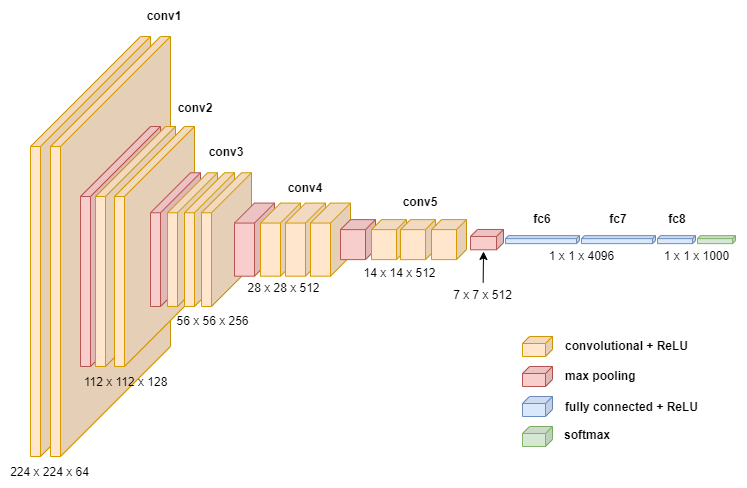

In [99]:
Image(filename='/content/grive/MyDrive/Slides/Project1/vgg16.png', width=800,height=500)

#### **1_1_1_8: Instantiate in code using built-in class**

##### **Import necessary library and class**

In [100]:
from tensorflow.keras.applications.vgg16 import VGG16

##### **Instantiate the VGG16 base model**

In [101]:
A = keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

##### **Important Arguments**

**include_top:**

> Whether to include the 3 fully-connected layers at the top of the network.


**weights:**


> One of None (random initialization), "imagenet" (pre-training on ImageNet), or the path to the weights file to be loaded.

**input_shape:**

> Optional shape tuple, only to be specified if include_top is False, otherwise the input shape has to be (224, 224, 3) (with channels_last data format) or (3, 224, 224) (with "channels_first" data format). It should have exactly 3 input channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.

**classes:**



> Optional number of classes to classify images into, only to be specified if include_top is True, and if no weights argument is specified.




### **1_1_2: ResNet50**

#### **1_1_2_0: Background**

**Challenges with Deep Convolutional Architectures**:

1. **Loss of Information**:
    - As networks become deeper, random initialization of weights and biases can introduce random noise in the layers, resulting in the loss of important signals and information as the data flows forward through the network.

2. **Challenges with Backpropagation**:
    - When performing backpropagation, the partial derivatives of the random noise are calculated. This can lead to less meaningful gradients and may impede the training process.

3. **Vanishing Gradient Problem**:
    - The use of the chain rule in deep networks can lead to the vanishing gradient problem, where the gradients become very small after being multiplied across many layers. This can slow down or stall the learning process.

The use of **skip connections** in ResNet addresses these issues. By creating shortcuts that allow data to bypass certain layers, skip connections help preserve information and maintain meaningful gradients throughout the network. This innovation enhances the training of very deep networks and improves overall performance.

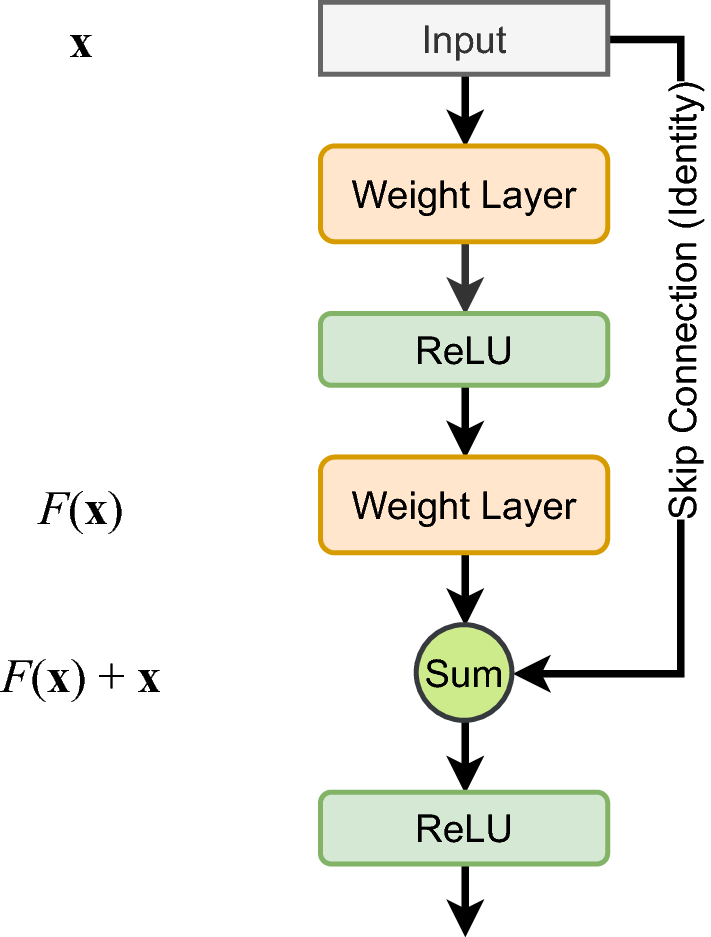

In [102]:
Image(filename='/content/grive/MyDrive/Slides/Project1/skip-connections.png', width=300,height=500)

#### **1_1_2_1: Brief Explaination**

ResNet50, short for Residual Network with 50 layers, is a popular deep convolutional neural network architecture, known for its use of residual connections or skip connections.

#### **1_1_2_2: Introduced by**

Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun

#### **1_1_2_3: Paper**

["Deep Residual Learning for Image Recognition"](https://arxiv.org/abs/1512.03385)

#### **1_1_2_4: Dataset**

The original ResNet50 model was trained on the **ImageNet** dataset.

#### **1_1_2_5: Architecture**

Architecture:

* ResNet50 is composed of 50 layers, including convolutional layers, pooling layers, and fully connected layers.
* It contains four stages of convolutional layers, with each stage consisting of several residual blocks.
* The architecture uses **residual connections**, which add the input of a block directly to its output. This helps mitigate the problem of vanishing gradients and enables training much deeper networks.

1. **Input Layer**:
    - **Dimensions**: The input layer expects images with a size of **224x224 pixels** and **3 color channels (RGB)**.

2. **Convolutional Blocks**:
    - **First Convolutional Block**:
        * **Layers**: The first convolutional block consists of several layers, including convolutional layers, batch normalization, and ReLU activation.
        * **Convolutional Layers**: The block starts with a 7x7 convolutional layer with 64 filters and a stride of 2.
        * **Max Pooling**: After the first convolutional layer, a max-pooling layer with a 3x3 kernel and a stride of 2 is applied to reduce the spatial dimensions.

3. **Residual Blocks**:
    - **Stage 1**:
        - The first stage of ResNet50 contains three identity blocks.
    - **Stage 2**:
        - The second stage contains a bottleneck block followed by three identity blocks.
    - **Stage 3**:
        - The third stage contains a bottleneck block followed by five identity blocks.
    - **Stage 4**:
        - The fourth stage contains a bottleneck block followed by two identity blocks.

4. **Global Average Pooling**:
    - After the last convolutional stage, global average pooling is applied to reduce the spatial dimensions of the feature maps to a single vector.

5. **Fully Connected Layer**:
    - Following global average pooling, a fully connected layer with 1000 units is added, representing the output classes of the model (e.g., 1000 classes in the ImageNet dataset).
    - The final layer typically employs softmax activation for classification.


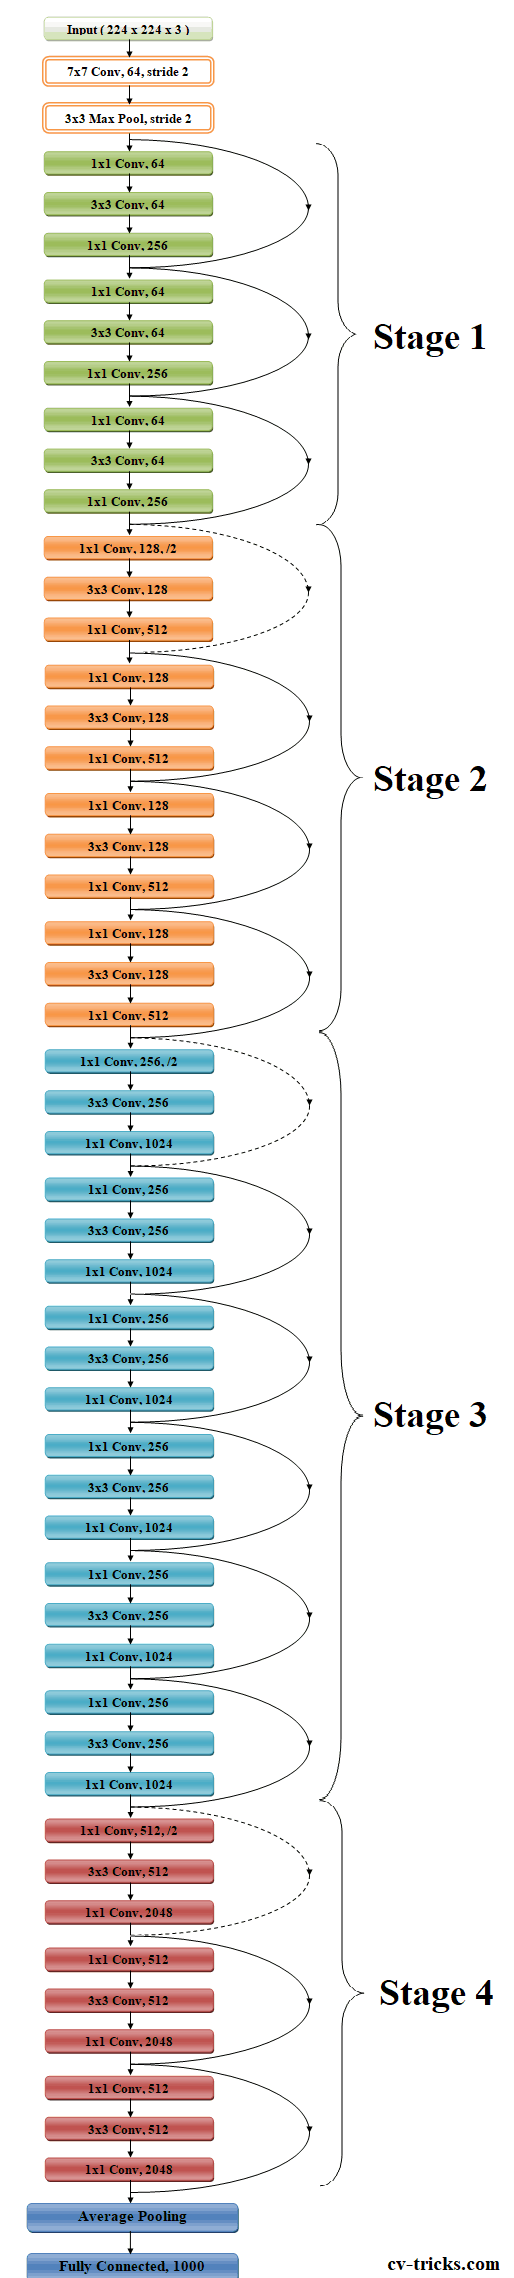

In [103]:
Image(filename='/content/grive/MyDrive/Slides/Project1/ResNet50_architecture-1.png', width=450,height=3000)

source: https://cv-tricks.com/keras/understand-implement-resnets/

#### **1_1_2_6: Kinds of Skip Connections**

##### **Identity Block:**
when:
$$ inputSize == outputSize $$

##### **Concolutional(bottleneck) Block:**
when:
$$ inputSize != outputSize $$

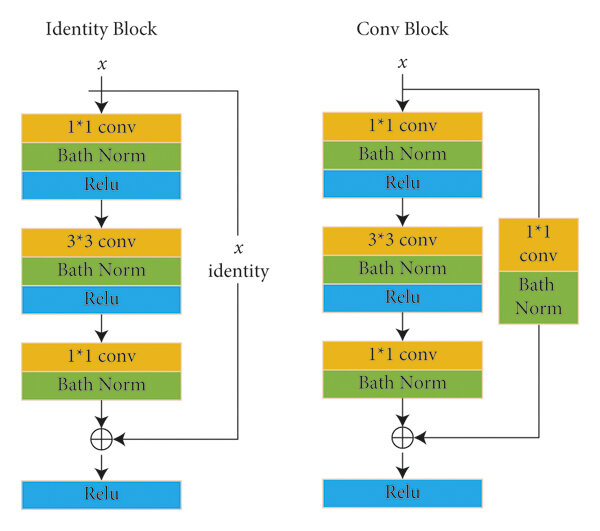

In [104]:
Image(filename='/content/grive/MyDrive/Slides/Project1/ResNet50-Identity-Block-and-Conv-Block.png', width=500,height=600)

source: https://www.researchgate.net/figure/ResNet50-Identity-Block-and-Conv-Block_fig2_363894256

#### **1_1_2_7: Implementation from scratch**

##### **Identity block**

In [105]:
def identity_block(X, f, filters, stage, block):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

##### **Convolutional block**

In [106]:
def convolutional_block(X, f, filters, stage, block, s = 2):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

##### **The main ResNet50 model**

In [107]:
def ResNet50_(input_shape=(224, 224, 3), classes=3):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)

    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')

    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

# --------------------------------------------------------------------------------------------------------------

    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D((2,2), name="avg_pool")(X)

    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)

    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model


#### **1_1_2_8: Instantiate in code using built-in class**

##### **Import necessary class**

In [108]:
from tensorflow.keras.applications import ResNet50

##### **Instantiate ResNet50 base model**

In [109]:
tf.keras.applications.ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

###### ***sources:***

* https://towardsdatascience.com/creating-vgg-from-scratch-using-tensorflow-a998a5640155

* https://datagen.tech/guides/computer-vision/vgg16/

* https://keras.io/api/applications/vgg/

* https://www.geeksforgeeks.org/vgg-16-cnn-model/

* https://medium.com/@mygreatlearning/everything-you-need-to-know-about-vgg16-7315defb5918

* https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50

## **1_2: Implementation**

### **1_2_0: Outlook:**

In this part, we are going to compare the VGG16 and ResNeT50 models for classifying skin conditions with and without **data augmentation**.

### **1_2_1: Data Augmentation:**


 Data augmentation refers to the process of **artificially increasing the size of a dataset** by applying various transformations to the existing data samples. These transformations include, but are not limited to, **rotation**, **translation**, **scaling**, **flipping**, **cropping**, **changing brightness and contrast**, **adding noise**, and other modifications.

The primary objective of data augmentation is to **increase the diversity of the training data** without collecting additional labeled samples. By generating new variations of the existing data, data augmentation helps improve the **generalization and robustness** of machine learning models. It enables the model to learn invariant features from different perspectives, thereby enhancing its performance on unseen data and **reducing overfitting**.

### **1_2_2: Preprocess**

#### **1_2_2_1: find the datapath of the dataset**

In [110]:
dataset_path = "/content/grive/MyDrive/AI_Project1/Dataset"

#### **1_2_2_2: Import necessary library to work with files**

In [111]:
import os

#### **1_2_2_3: To list the names of files and directories within a specified directory path, we use 'os.listdir(dataset_path)'**

In [112]:
different_skin_conditions = os.listdir(dataset_path)

different_skin_conditions

['Carcinoma', 'Melanoma', 'Nevus']

#### **1_2_2_4: Make a list to restore all different image file's paths**

In [113]:
conditions = []

#### **1_2_2_5: Add the image files' names to their condition item**

In [114]:
for condition in different_skin_conditions:

  condition_path = dataset_path + '/' + condition
  pictures_of_condition = os.listdir(condition_path)

  for picture in pictures_of_condition:
    conditions.append((condition, condition_path + '/' + picture))

conditions

[('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028570.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028747.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028677.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028928.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0029082.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028815.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028653.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0029034.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028814.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028994.jpg'),
 ('Carcinoma',
  '/content/grive/MyDrive/AI_Project1/Dataset/Carcinoma/ISIC_0028542.jpg'),

#### **1_2_2_6: Add essential libaries to work with dataframes and arrays**

In [115]:
import pandas as pd
import numpy as np

#### **1_2_2_7: Create dataframe containing image files' names and their condition type**

In [116]:
conditions_df = pd.DataFrame(data=conditions, columns=['condition_type', 'image_name'])

print(conditions_df.head())
print(conditions_df.tail())

  condition_type                                         image_name
0      Carcinoma  /content/grive/MyDrive/AI_Project1/Dataset/Car...
1      Carcinoma  /content/grive/MyDrive/AI_Project1/Dataset/Car...
2      Carcinoma  /content/grive/MyDrive/AI_Project1/Dataset/Car...
3      Carcinoma  /content/grive/MyDrive/AI_Project1/Dataset/Car...
4      Carcinoma  /content/grive/MyDrive/AI_Project1/Dataset/Car...
    condition_type                                         image_name
168          Nevus  /content/grive/MyDrive/AI_Project1/Dataset/Nev...
169          Nevus  /content/grive/MyDrive/AI_Project1/Dataset/Nev...
170          Nevus  /content/grive/MyDrive/AI_Project1/Dataset/Nev...
171          Nevus  /content/grive/MyDrive/AI_Project1/Dataset/Nev...
172          Nevus  /content/grive/MyDrive/AI_Project1/Dataset/Nev...


#### **1_2_2_8: Count the number of pictures of all conditions**

In [117]:
print("Total number of skin conditions' pictures in the dataset: ", len(conditions_df))

Total number of skin conditions' pictures in the dataset:  173


#### **1_2_2_9: Count the number of pictures in each category of conditions**

In [118]:
condition_count = conditions_df['condition_type'].value_counts()

print("condition's pictures in each category: ")
print(condition_count)

condition's pictures in each category: 
condition_type
Melanoma     64
Nevus        59
Carcinoma    50
Name: count, dtype: int64


#### **1_2_2_10: Create our image and label list and remove repetitive pictures**

In [119]:
import cv2
im_size = 224

images = []
labels = []
sample = 0
count = 0
flag = True
for condition in different_skin_conditions:
    condition_data_path = dataset_path + '/' + condition
    filenames = [i for i in os.listdir(condition_data_path) ]

    for filename in filenames:
        flag = True
        img = cv2.imread(condition_data_path + '/' + filename)
        img = cv2.resize(img, (im_size, im_size))

        # Check if it is a copy
        for i in images:
          diff = cv2.absdiff(img, i)
          mean_diff = np.mean(diff)
          if mean_diff == 0:
            sample = diff
            if flag:
               count+=1
            flag = False
        # If it is not a copy, then add it to the list
        if(flag):
          images.append(img)
          labels.append(condition)

print(len(labels))
print(len(images))
print(count)
print(sample)


142
142
31
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


#### **1_2_2_11: Transform the image into a numpy array**

In [120]:
images = np.array(images)
images.shape

(142, 224, 224, 3)

#### **1_2_2_12: Scale and normalize our data**

In [121]:
images = images / 255.0

#### **1_2_2_13: Import necessary classes and library to do some preprocessing like label encoding and one-hot encoding**

In [122]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

#### **1_2_2_14: Achieve conditions of each picture in our dataframe**

In [123]:
y = np.array(labels)
y

array(['Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma',
       'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma',
       'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma',
       'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma',
       'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma',
       'Mela

#### **1_2_2_15: Do Label encoding**

It is used to convert categorical data (data with distinct labels or categories) into numerical form.

**fit_transform method:**

* **Fitting:** It learns the unique categories in the 'y' data. For example, if 'y' contains categories like ['Nevus', 'Carcinoma', 'Melanoma'], the fit step assigns the integer labels 0, 1, and 2 to these categories, respectively.

* **Transforming:** After learning the unique categories, it replaces each category in the 'y' data with its corresponding numerical label. So, if 'y' originally contained values like ['Nevus', 'Carcinoma', 'Melanoma'], after the transformation, 'y' will contain the numerical labels assigned in the fitting step.

In [124]:
# Instantiate from the LabelEncoder class to work with
y_labelencoder = LabelEncoder ()
# Perform label encoding on the y data
y = y_labelencoder.fit_transform (y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### **1_2_2_16: Do One-hot encoding**

In one-hot encoding, each category is represented by a separate binary column (either 0 or 1). If there are 'n' categories, 'n' new binary columns are created. When a data point belongs to a particular category, the corresponding binary column for that category will have a value of 1, and all other columns will have a value of 0.

#### **1_2_2_17: reshape the y data**

##### **reshape(-1,1)**

* **first arqument:** the number of rows

* **second argument**: the number of columns

In Python, using "-1" in a specific context, like the reshape() function, means you are specifying the number of elements in that dimension of the array. This feature allows you to maintain the total number of elements in the array while changing its shape or dimensions.

In [125]:
y=y.reshape(-1,1)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

#### **1_2_2_18: Use OneHotEncoder**
* **categories='auto':** This argument tells the OneHotEncoder function to automatically find the categories in the data.

* **sparse=False:** This argument specifies the output format. When you set sparse=False, the function will return the one-hot encoded output in a dense format, like below output.

In [126]:
# Instantiate an object from the OneHotEncoder class to work with
onehotencoder=OneHotEncoder(categories='auto', sparse=False)
# Apply the one-hot encoding to the data
Y= onehotencoder.fit_transform(y)

print(f"The dimentions before one-hot encoding: {y.shape}")

print(f"The dimentions after one-hot encoding: {Y.shape}")

Y

The dimentions before one-hot encoding: (142, 1)
The dimentions after one-hot encoding: (142, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

#### **1_2_2_19: Shuffle images**

**random_state=1:** The purpose of random_state is to ensure reproducibility of the shuffling results. As long as you use the same random_state value across different runs of your code, you will get the same shuffled order.

When you set random_state to a specific value, you are effectively setting a seed for the random number generator. This seed ensures that the same sequence of random numbers will be generated every time the code is executed

In [127]:
from sklearn.utils import shuffle

images, Y = shuffle(images, Y, random_state=1)

Y

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0

### **1_2_3: Necessary libraries and functions**

#### **1_2_3_1: Necessary libraries, modules and classes to work with neural network models**

In [128]:
from keras.models import Model

from keras.layers import Input, Add, Dense, Activation,BatchNormalization, Flatten, Conv2D, Dropout, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D

from keras import Sequential

#### **1_2_3_2: Import the library to initialize our parameters (weights and biases)**

In [129]:
from keras.initializers import glorot_uniform, he_normal

#### **1_2_3_3: Import the library to plot the results**

In [130]:
import matplotlib.pyplot as plt

#### **1_2_3_4: Function to show the accuracy of the model in each epoch**

In [131]:
def display_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train accuracy', 'Validation accuracy','Train loss'], loc='upper right')
  # plt.ylim(ymax=2, ymin=0)
  plt.show()

#### **1_2_3_5: Function to show the loss of the model in each epoch**

In [132]:
def display_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train loss', 'Validation loss'], loc='upper left')
  # plt.ylim(ymax=5, ymin=0)
  plt.show()


#### **1_2_3_6: Module to split the data**

In [133]:
from sklearn.model_selection import train_test_split

### **1_2_4: Apply ResNet50 without Data Augmentation**

#### **1_2_4_1: split data into train and validation set**

In [134]:
X_train, X_valid, y_train, y_valid = train_test_split(images, Y, test_size=0.20, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(113, 224, 224, 3)
(113, 3)
(29, 224, 224, 3)
(29, 3)


#### **1_2_4_2: Import the built in class for ResNet50 model**

In [135]:
from tensorflow.keras.applications import ResNet50

#### **1_2_4_3: Instantiate from the ResNet50 class as our base model**

In [136]:
ResNet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#### **1_2_4_4: Make the layers of ResNet50 base model untrainable**

In [137]:
ResNet50_base.trainable = False

#### **1_2_4_5: Make our own model by adding some layers**

In [138]:
ResNet50_model = Sequential([
    ResNet50_base,
    Flatten(),
    Dense(1024, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1024, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1024, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

#### **1_2_4_6: Compile the model**

##### **Note about learning-rate:**
Train the entire model (frozen layers + new layers) with a very low learning rate

A common starting point for the learning rate in transfer learning is between 1e-4 (0.0001) and 1e-5 (0.00001). This lower range helps in fine-tuning the pre-trained weights without making significant changes, allowing the new layers to learn from your small dataset.

Pre-trained Model Strength: If the pre-trained model is already very strong on a similar task, you might use an even lower learning rate (e.g., 1e-6) to avoid disturbing the well-learned weights.

In [139]:
from keras.optimizers import Adam

ResNet50_model.compile(optimizer=Adam(learning_rate = 1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

#### **1_2_4_7: Review the structure of model**

In [140]:
ResNet50_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_21 (Ba  (None, 100352)            401408    
 tchNormalization)                                               
                                                                 
 dense_27 (Dense)            (None, 1024)              102761472 
                                                                 
 batch_normalization_22 (Ba  (None, 1024)              4096      
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 1024)             

#### **1_2_4_8: Find the number of layers used in our ResNet50 model**

In [141]:
print(len(ResNet50_base.layers))
print(len(ResNet50_model.layers))

175
22


#### **1_2_4_9: Train our model**

The verbose parameter is used to control the amount of information displayed during the training process.

* verbose = 0: Training progress is silent. No information is displayed

* verbose = 1: Training progress is shown in progress bars or logs, typically for each epoch.

* verbose = 2: Training progress is shown in a more detailed manner.

In [142]:
history1=ResNet50_model.fit(X_train, y_train, batch_size=7, epochs=100 , verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/100
17/17 [==============================] - 12s 199ms/step - loss: 2.0575 - accuracy: 0.3540 - val_loss: 1.3916 - val_accuracy: 0.2759
Epoch 2/100
17/17 [==============================] - 1s 76ms/step - loss: 1.8502 - accuracy: 0.3540 - val_loss: 1.2757 - val_accuracy: 0.2759
Epoch 3/100
17/17 [==============================] - 1s 67ms/step - loss: 2.1808 - accuracy: 0.3540 - val_loss: 1.1458 - val_accuracy: 0.3103
Epoch 4/100
17/17 [==============================] - 1s 67ms/step - loss: 2.0753 - accuracy: 0.3363 - val_loss: 1.1576 - val_accuracy: 0.3793
Epoch 5/100
17/17 [==============================] - 1s 68ms/step - loss: 1.8388 - accuracy: 0.3805 - val_loss: 1.2085 - val_accuracy: 0.3793
Epoch 6/100
17/17 [==============================] - 1s 71ms/step - loss: 1.7953 - accuracy: 0.3186 - val_loss: 1.2647 - val_accuracy: 0.3793
Epoch 7/100
17/17 [==============================] - 1s 71ms/step - loss: 2.0262 - accuracy: 0.3717 - val_loss: 1.2634 - val_accuracy: 0.3793
Epoc

#### **1_2_4_10: Evaluate the model**

In [143]:
loss1, accuracy1 = ResNet50_model.evaluate(X_valid, y_valid)

1/1 [==============================] - 0s 144ms/step - loss: 1.0852 - accuracy: 0.4828


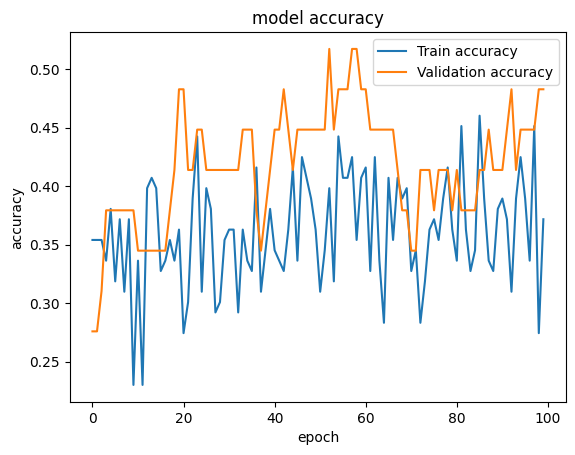

In [144]:
display_accuracy(history1)

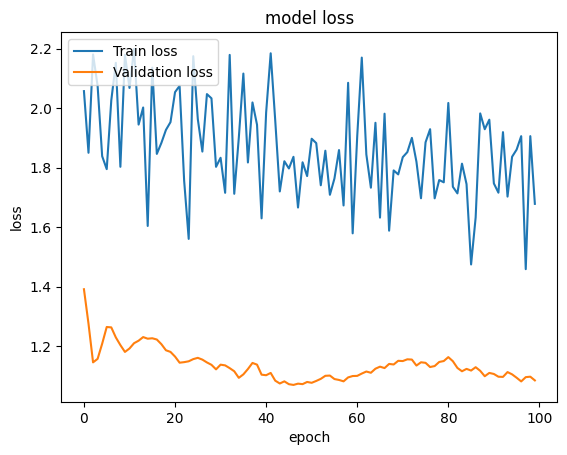

In [145]:
display_loss(history1)

#### **1_2_4_11: Previous results**


The result with built-in ResNet50 and some layers added in the end to be trained with batch-size = 7: (epochs = 40) (4 relu, 512 units, he-normal, dropout = 0.5 and batch-normalization)

2/2 [==============================] - 3s 1s/step - loss: 2.6853 - accuracy: 0.5814

The result with built-in ResNet50 and some layers added in the end to be trained: (epochs = 40)

2/2 [==============================] - 1s 1s/step - loss: 5.5320 - accuracy: 0.4651

The result with ResNet50 built from scratch with batch-size = 11: (epochs = 40)

2/2 [==============================] - 0s 64ms/step - loss: 0.8474 - accuracy: 0.6744

The result with ResNet50 built from scratch with batch-size = 9: (epochs = 40)

2/2 [==============================] - 0s 57ms/step - loss: 2.1891 - accuracy: 0.6047

The result with ResNet50 built from scratch with batch-size = 7: (epochs = 40)

* first time:

2/2 [==============================] - 0s 62ms/step - loss: 0.5690 - accuracy: 0.7674

* second time:

2/2 [==============================] - 3s 1s/step - loss: 8.0230 - accuracy: 0.3488

The result with ResNet50 built from scratch with batch-size = 5: (epochs = 40)

2/2 [==============================] - 0s 63ms/step - loss: 0.8860 - accuracy: 0.7209

The result with ResNet50 built from scratch with batch-size = 3: (epochs = 40)

2/2 [==============================] - 0s 69ms/step - loss: 1.8947 - accuracy: 0.3953

The result with ResNet50 built from scratch with batch-size = 1: (epochs = 40)

2/2 [==============================] - 2s 59ms/step - loss: 7.4493 - accuracy: 0.4186

The result with ResNet50 built from scratch with batch-size = 7: (epochs = 100)

* first time:

2/2 [==============================] - 0s 51ms/step - loss: 1.7429 - accuracy: 0.4651

* second time:

2/2 [==============================] - 0s 49ms/step - loss: 0.7368 - accuracy: 0.7674

100 epoch, lr = 1e-5, batch = 3, 20% split, 4 layers, with drop out 0.5 and batch normalization, 512 units in each

1/1 [==============================] - 2s 2s/step - loss: 1.2151 - accuracy: 0.3448

100 epoch, lr = 1e-5, batch = 7, 20% split, 4 layers, with drop out 0.5 and batch normalization, 512 units in each


1/1 [==============================] - 0s 178ms/step - loss: 1.0774 - accuracy: 0.4483

### **1_2_5: Apply ResNet50 With Data Augmentation**

#### **1_2_5_1: Split the data**

Validation set will get a bigger portion of our data because we are using data augmentation on training data

In [236]:
X_train, X_valid, y_train, y_valid = train_test_split(images, Y, test_size=0.40, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(85, 224, 224, 3)
(85, 3)
(42, 224, 224, 3)
(42, 3)
(15, 224, 224, 3)
(15, 3)


#### **1_2_5_2: Import necessary class to do data augmentation**

In [237]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### **1_2_5_3: Instantiate from the ImageDataGenerator class**

**Trainslation**
* Width Shift Range (float): This defines the maximum fraction by which the image can be shifted horizontally.

Shift image up to 10% horizontally

* Height Shift Range (float): This defines the maximum fraction by which the image can be shifted vertically.

Shift image up to 10% vertically

**rotation**

* rotation_range=20: Random rotation between -20 and 20 degrees

**horizontal_flip**

 * This parameter enables random horizontal flipping of the images, which can help the model learn to be invariant to the orientation of objects in the images.

**rescale**

* This parameter scales pixel values from their original range (typically 0-255 for images) to a new range. Here, it's set to 1./255, which scales all pixel values between 0 and 1. This helps normalize the data and improve model performance, especially for deep convolutional neural networks.

* rescale=1./255,  # Rescale pixel values to [0, 1]


**shear_range:**

* This parameter introduces random shearing transformations to the image. A value between 0 and 1 specifies the maximum shear angle in degrees.

* For example, shear_range=0.2 would introduce random horizontal or vertical shears with angles between -20 degrees and +20 degrees.

**zoom_range:**

* e.g. zoom_range=0.2 means that the images can be zoomed in or out by up to 20% of their original size in both directions (horizontal and vertical)


In [238]:
data_generator = ImageDataGenerator(
                                    rescale = 1.0/255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    rotation_range=20,
                                    width_shift_range= 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True,
                                    # vertical_flip = True,
                                    brightness_range=[-0.2, 0.2]
                                    )

#### **1_2_5_4: Specify how the data will be generated and batched during training**

In [239]:
train_generator = data_generator.flow (X_train, y_train, batch_size = 1)

#### **1_2_5_5: Specify the number of steps (batches) to be processed in each epoch during training**

Setting steps_per_epoch = X_train.shape[0] with a batch size of 7 means that each real sample will be augmented to create additional artificial samples within each batch, ensuring that all real samples are utilized for training in each epoch.

In [240]:
steps_per_epoch = X_train.shape[0] / 1

#### **1_2_5_6: Make the ResNet50 model with data augmentation**

In [241]:
ResNet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

ResNet50_base.trainable = False

In [242]:
ResNet50_model_with_augmentation = Sequential([
    ResNet50_base,
    Flatten(),
    Dense(1024, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1024, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1024, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

#### **1_2_5_7: Compile the model**

In [243]:
ResNet50_model_with_augmentation.compile(optimizer=Adam(learning_rate = 1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

#### **1_2_5_8: Train the model**

In [244]:
history2 = ResNet50_model_with_augmentation.fit_generator(train_generator, steps_per_epoch = steps_per_epoch, epochs = 100 ,verbose=1, validation_data=(X_valid, y_valid))

<ipython-input-244-b531b4c26712>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = ResNet50_model_with_augmentation.fit_generator(train_generator, steps_per_epoch = steps_per_epoch, epochs = 100 ,verbose=1, validation_data=(X_valid, y_valid))


Epoch 1/100
2/2 [==============================] - 8s 1s/step - loss: 1.0979 - accuracy: 0.3882 - val_loss: 1.2606 - val_accuracy: 0.2619
Epoch 2/100
2/2 [==============================] - 2s 737ms/step - loss: 1.1283 - accuracy: 0.3176 - val_loss: 1.2430 - val_accuracy: 0.2619
Epoch 3/100
2/2 [==============================] - 1s 488ms/step - loss: 1.1313 - accuracy: 0.3647 - val_loss: 1.2260 - val_accuracy: 0.2619
Epoch 4/100
2/2 [==============================] - 1s 502ms/step - loss: 1.1215 - accuracy: 0.3647 - val_loss: 1.2193 - val_accuracy: 0.2619
Epoch 5/100
2/2 [==============================] - 1s 611ms/step - loss: 1.1463 - accuracy: 0.2824 - val_loss: 1.2195 - val_accuracy: 0.2619
Epoch 6/100
2/2 [==============================] - 1s 583ms/step - loss: 1.0742 - accuracy: 0.4353 - val_loss: 1.2205 - val_accuracy: 0.2619
Epoch 7/100
2/2 [==============================] - 1s 508ms/step - loss: 1.1485 - accuracy: 0.3176 - val_loss: 1.2150 - val_accuracy: 0.2619
Epoch 8/100
2/2 

#### **1_2_5_9: Evaluate the model**

In [245]:
loss2, accuracy2 = ResNet50_model_with_augmentation.evaluate(X_valid, y_valid)

1/1 [==============================] - 1s 1s/step - loss: 0.9512 - accuracy: 0.6000


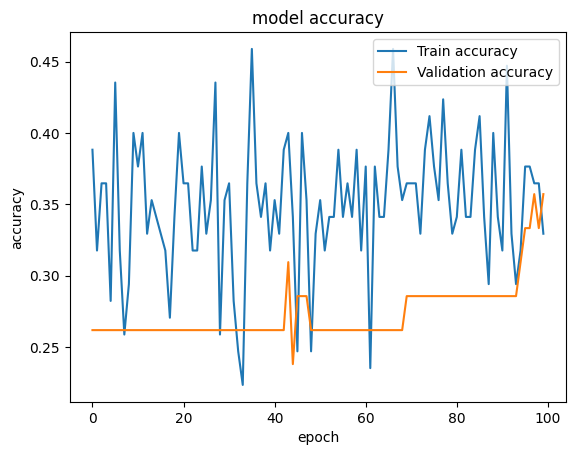

In [246]:
display_accuracy(history2)

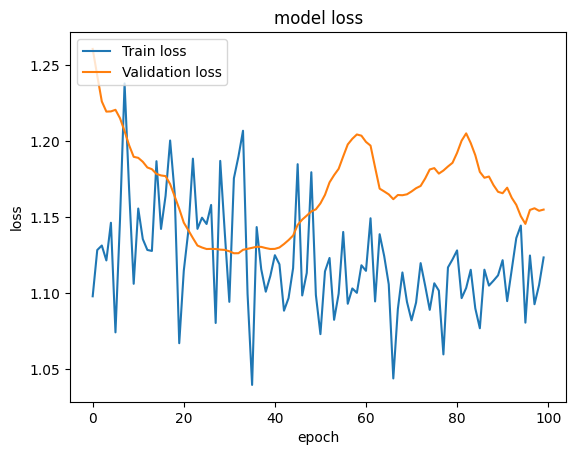

In [247]:
display_loss(history2)

batch = 7

3/3 [==============================] - 12s 3s/step - loss: 176.3050 - accuracy: 0.1972

batch = 2

3/3 [==============================] - 13s 4s/step - loss: 1.2324 - accuracy: 0.3380

batch = 32

1/1 [==============================] - 1s 1s/step - loss: 0.9512 - accuracy: 0.6000


### **1_2_6: VGG16 model without Data Augmentation**

#### **1_2_6_0: Import VGG16 class**

In [248]:
from tensorflow.keras.applications.vgg16 import VGG16

#### **1_2_6_1: Split the data**

In [249]:
X_train, X_valid, y_train, y_valid = train_test_split(images, Y, test_size=0.20, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(113, 224, 224, 3)
(113, 3)
(29, 224, 224, 3)
(29, 3)


#### **1_2_6_2: Instantiate VGG16 model**

In [250]:
VGG16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


#### **1_2_6_3: Specify that VGG16 layers are not trainable**

In [251]:
VGG16_base.trainable = False

#### **1_2_6_4: Add some layers to our base VGG16 model to make it trainable on its new layers**

In [252]:
VGG16_model = Sequential([
    VGG16_base,
    Flatten(),
    Dense(1024, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1024, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1024, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

#### **1_2_6_5: Compile the VGG16-based model**

In [253]:
VGG16_model.compile(optimizer=Adam(learning_rate = 1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

#### **1_2_6_6: Train the model**

In [254]:
history3=VGG16_model.fit(X_train, y_train, batch_size=7, epochs=100, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/100
17/17 [==============================] - 10s 154ms/step - loss: 1.8882 - accuracy: 0.3628 - val_loss: 1.1711 - val_accuracy: 0.3793
Epoch 2/100
17/17 [==============================] - 1s 63ms/step - loss: 1.5786 - accuracy: 0.3894 - val_loss: 1.1179 - val_accuracy: 0.3103
Epoch 3/100
17/17 [==============================] - 1s 76ms/step - loss: 1.8636 - accuracy: 0.3009 - val_loss: 1.1660 - val_accuracy: 0.3448
Epoch 4/100
17/17 [==============================] - 1s 69ms/step - loss: 2.0656 - accuracy: 0.3451 - val_loss: 1.1906 - val_accuracy: 0.3448
Epoch 5/100
17/17 [==============================] - 1s 75ms/step - loss: 1.9903 - accuracy: 0.2920 - val_loss: 1.1897 - val_accuracy: 0.3448
Epoch 6/100
17/17 [==============================] - 1s 72ms/step - loss: 1.9961 - accuracy: 0.3363 - val_loss: 1.2197 - val_accuracy: 0.3793
Epoch 7/100
17/17 [==============================] - 1s 66ms/step - loss: 1.9311 - accuracy: 0.3097 - val_loss: 1.2327 - val_accuracy: 0.3793
Epoc

#### **1_2_6_7: Evalute our model**

In [255]:
loss3, accuracy3 = VGG16_model.evaluate(X_valid, y_valid)

1/1 [==============================] - 6s 6s/step - loss: 1.1522 - accuracy: 0.5172


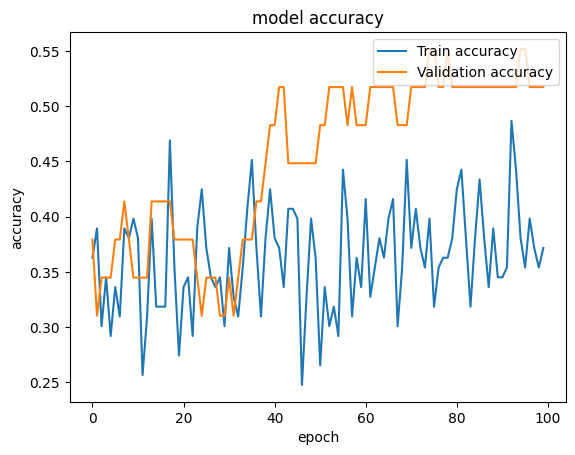

In [256]:
display_accuracy(history3)

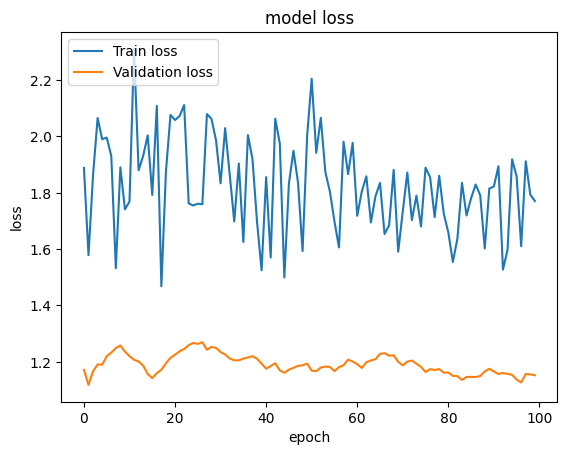

In [257]:
display_loss(history3)

lr = 1e-4

1/1 [==============================] - 17s 17s/step - loss: 1.5457 - accuracy: 0.5862

lr = 1e-5, batch = 7, 6 layers

1/1 [==============================] - 6s 6s/step - loss: 1.1522 - accuracy: 0.5172

### **1_2_7: VGG16 model With Data Augmentation**

#### **1_2_7_1: Split the data**

In [286]:
X_train, X_valid, y_train, y_valid = train_test_split(images, Y, test_size=0.20, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(85, 224, 224, 3)
(85, 3)
(42, 224, 224, 3)
(42, 3)
(15, 224, 224, 3)
(15, 3)


#### **1_2_7_2: Instantiate VGG16 model**

In [287]:
VGG16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#### **1_2_7_3: Specify that VGG16 layers are not trainable**

In [288]:
VGG16_base.trainable = False

#### **1_2_7_4: Add some layers to our base VGG16 model to make it trainable on its new layers**

In [289]:
VGG16_model_with_augmentation = Sequential([
    VGG16_base,
    Flatten(),
    Dense(1024, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1024, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1024, activation='relu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

#### **1_2_7_5: Instantiate from the ImageDataGenerator class**

In [290]:
data_generator = ImageDataGenerator(rescale = 1.0/255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    rotation_range=20,
                                    width_shift_range= 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True,
                                    # vertical_flip = True,
                                    brightness_range=[-0.2, 0.2]
                                    )

#### **1_2_7_6: Specify how data will be generated**

In [291]:
train_generator = data_generator.flow(X_train, y_train, batch_size = 1)

#### **1_2_7_7: Specify the number of batches in each iteration**

In [292]:
steps_per_epoch = X_train.shape[0] / 1

#### **1_2_7_8: Compile the model**

In [293]:
VGG16_model_with_augmentation.compile(optimizer=Adam(learning_rate = 1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

#### **1_2_7_9: Train the model**

In [294]:
history4 = VGG16_model_with_augmentation.fit_generator(train_generator, steps_per_epoch = steps_per_epoch, epochs = 100,verbose=1, validation_data=(X_valid, y_valid))

<ipython-input-294-6ecd9d02bf9c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history4 = VGG16_model_with_augmentation.fit_generator(train_generator, steps_per_epoch = steps_per_epoch, epochs = 100,verbose=1, validation_data=(X_valid, y_valid))


Epoch 1/100
2/2 [==============================] - 13s 4s/step - loss: 1.1070 - accuracy: 0.3765 - val_loss: 1.1105 - val_accuracy: 0.4048
Epoch 2/100
2/2 [==============================] - 1s 657ms/step - loss: 1.1112 - accuracy: 0.3647 - val_loss: 1.1103 - val_accuracy: 0.4048
Epoch 3/100
2/2 [==============================] - 2s 709ms/step - loss: 1.1442 - accuracy: 0.3294 - val_loss: 1.1121 - val_accuracy: 0.4048
Epoch 4/100
2/2 [==============================] - 1s 609ms/step - loss: 1.0727 - accuracy: 0.4118 - val_loss: 1.1130 - val_accuracy: 0.4048
Epoch 5/100
2/2 [==============================] - 1s 606ms/step - loss: 1.1792 - accuracy: 0.2471 - val_loss: 1.1141 - val_accuracy: 0.4048
Epoch 6/100
2/2 [==============================] - 2s 704ms/step - loss: 1.1357 - accuracy: 0.3529 - val_loss: 1.1172 - val_accuracy: 0.4048
Epoch 7/100
2/2 [==============================] - 2s 897ms/step - loss: 1.1315 - accuracy: 0.4000 - val_loss: 1.1167 - val_accuracy: 0.4048
Epoch 8/100
2/2

#### **1_2_7_10: Evaluate the model**

In [295]:
loss4, accuracy4 = VGG16_model_with_augmentation.evaluate(X_test, y_test)

1/1 [==============================] - 4s 4s/step - loss: 4.3037 - accuracy: 0.4000


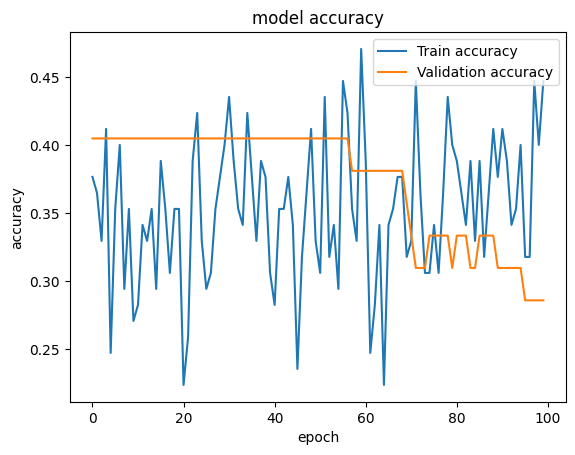

In [296]:
display_accuracy(history4)

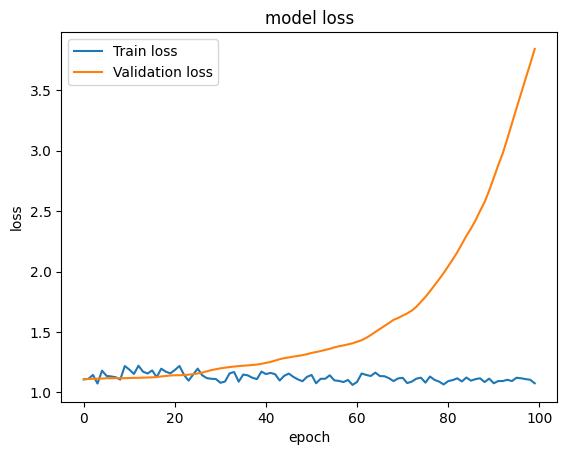

In [297]:
display_loss(history4)

overfit, lr = 1e-3, batch = 32, epoch = 100, split = 60, 30, 10

1/1 [==============================] - 4s 4s/step - loss: 4.3037 - accuracy: 0.4000

### **1_2_8: Last Comparison**

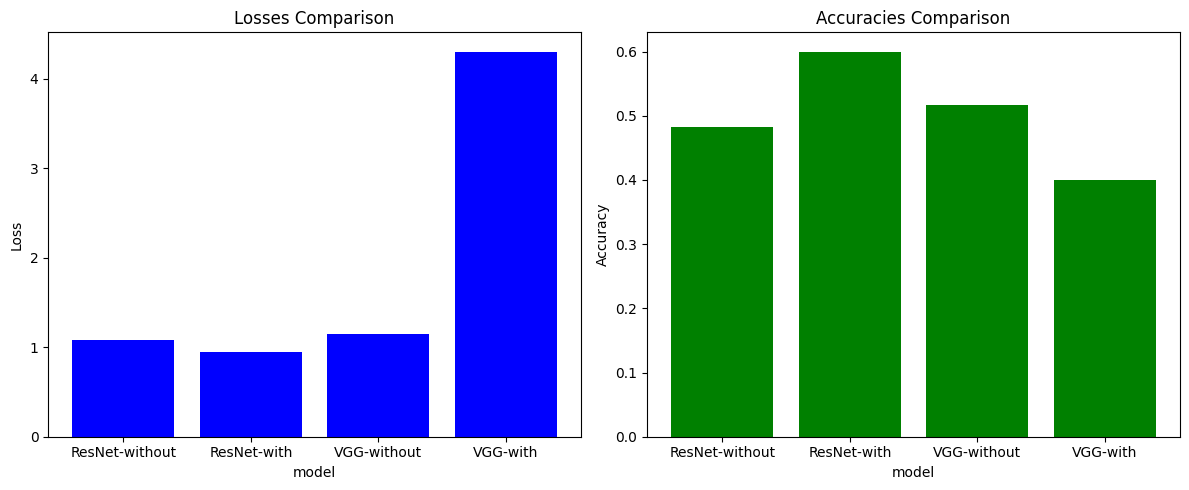

In [298]:
losses = [loss1, loss2, loss3, loss4]
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4]

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for losses
ax1.bar(['ResNet-without', 'ResNet-with', 'VGG-without', 'VGG-with'], losses, color='blue')
ax1.set_title('Losses Comparison')
ax1.set_ylabel('Loss')
ax1.set_xlabel('model')

# Plot for accuracies
ax2.bar(['ResNet-without', 'ResNet-with', 'VGG-without', 'VGG-with'], accuracies, color='green')
ax2.set_title('Accuracies Comparison')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('model')

plt.tight_layout()
plt.show()

## **1_3: Pros & Cons of Data Augmentation**

### **1_3_1: Advantages**

1. **Improved Generalization**:
    - By providing the model with a more diverse set of training examples, data augmentation can help improve its ability to generalize to unseen data.
    
2. **Reduced Overfitting**:
    - Data augmentation effectively increases the size of the training dataset, which can help reduce overfitting and improve the model's performance on the validation set.
    
3. **Robustness to Variations**:
    - Models trained with augmented data can become more robust to variations such as rotation, scaling, and other distortions in the input data.
    
4. **Better Feature Learning**:
    - The variations introduced by data augmentation can help the model learn more useful and discriminative features.
    
5. **Cost-Effective**:
    - Data augmentation can be a cost-effective way to improve model performance without the need for additional labeled data.


### **1_3_2: Disadvantages**


1. **Increased Training Time**:
    - Data augmentation can increase training time as the model has to process more data, including the original and augmented images.
    
2. **Complexity in Pipeline**:
    - Implementing data augmentation can introduce complexity into the data preprocessing pipeline, which may require careful tuning and testing.
    
3. **Potential for Distortion**:
    - If data augmentation is applied too aggressively, it may introduce distortions that do not represent real-world variations, potentially harming model performance.
    
4. **Challenges in Reproducibility**:
    - The stochastic nature of some augmentation techniques can make it difficult to reproduce results consistently across different runs.
    
5. **Compatibility with Specific Models**:
    - Not all data augmentation techniques are compatible with every model architecture, so careful selection and testing are needed to ensure they benefit the model.



***source:***

https://ubiai.tools/what-are-the-advantages-anddisadvantages-of-data-augmentation-2023-update/

# <b><font color='green'>Part $II$:</font></b>

# <b><font color='green'>Part $III$:</font></b>

In [ ]:
import requests

url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"  # Download training data
filename = "train_32x32.mat"

response = requests.get(url, stream=True)

if response.status_code == 200:
  with open(filename, 'wb') as f:
    for chunk in response.iter_content(1024):
      f.write(chunk)
  print(f"Downloaded {filename}")
else:
  print(f"Failed to download {filename}. Status code: {response.status_code}")

# Repeat for test data (optional)
url = "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"
filename = "test_32x32.mat"

response = requests.get(url, stream=True)

if response.status_code == 200:
  with open(filename, 'wb') as f:
    for chunk in response.iter_content(1024):
      f.write(chunk)
  print(f"Downloaded {filename}")
else:
  print(f"Failed to download {filename}. Status code: {response.status_code}")


In [ ]:
import scipy.io as sio

# Assuming your downloaded file is named "train_32x32.mat"
data_train = sio.loadmat("train_32x32.mat")
data_test = sio.loadmat("test_32x32.mat")
# data_extra = sio.loadmat("extra_32x32.mat")

# Access data within the loaded dictionary
images_train = data_train["X"]  # Assuming images are stored under the key "X"
labels_train = data_train["y"]  # Assuming labels are stored under the key "y"
images_test = data_test["X"]
labels_test = data_test["y"]
# images_extra = data_extra["X"]
# labels_extra = data_extra["y"]

print(f"Images shape: {images_train.shape}")
print(f"Labels shape: {labels_train.shape}")
print(f"Images shape: {images_test.shape}")
print(f"Labels shape: {labels_test.shape}")
# print(f"Images shape: {images_extra.shape}")
# print(f"Labels shape: {labels_extra.shape}")

In [ ]:
import numpy as np

# Assuming your loaded images are stored in the variable "images"
images_train = images_train.transpose((3, 0, 1, 2))  # Transpose the axes
images_test = images_test.transpose((3, 0, 1, 2))  # Transpose the axes

print(f"Images shape after transpose: {images_train.shape}")
print(f"Images shape after transpose: {images_test.shape}")

In [ ]:
# # TensorFlow and tf.keras
# import tensorflow as tf

# # Helper libraries
# import numpy as np
# import matplotlib.pyplot as plt

# print(tf.__version__)

In [ ]:
# from tensorflow.keras.datasets import fashion_mnist

# (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [ ]:
# X_train.shape

In [ ]:
# X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
# X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [ ]:
# X_train.shape

In [ ]:

# Duplicate the existing channel three times
# X_train = np.repeat(X_train, 3, axis=3)
# X_test = np.repeat(X_test, 3, axis=3)

In [ ]:
# X_train.shape

In [ ]:
# import cv2

In [ ]:
# X_train = cv2.resize(X_train, (224,224))

In [ ]:
# !pip install deeplake

In [ ]:
# import deeplake

# ds_train = deeplake.load("hub://activeloop/gtsrb-train")

# ds_test = deeplake.load("hub://activeloop/gtsrb-test")

Train a model on the GTSRB dataset with TensorFlow in Python

In [ ]:
# dataloader_train = ds_train.tensorflow()

# dataloader_test = ds_test.tensorflow()

### Import the necessary libraries to work with models

In [ ]:
from keras.models import Model

from keras.layers import Input, Add, Dense, Activation,BatchNormalization, Flatten, Conv2D, Dropout, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

from keras import Sequential

## Different small dataset

When your dataset is small and very different from the original dataset used to train the pre-trained model, one of the key approaches to employ transfer learning is to use the pre-trained model as a feature extractor.

### Import VGG16 class

### Use VGG16 as our pre-trained model

In [ ]:
# VGG16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


### About ImageNet dataset
* Contains over 14 million high-resolution images
* Images are categorized into more than 20,000 different classes (nouns in WordNet hierarchy)

### Import the small and different dataset of German Traffic Signs Dataset (GTSRB)

This dataset contains around 50,000 images of German traffic signs across 43 different classes. It's a good choice for tasks related to traffic sign recognition in autonomous vehicles or driver assistance systems.

In [ ]:
# from sklearn.datasets import fetch_openml

# # Fetch the GTSRB dataset using the OpenML data ID for GTSRB
# # Data ID , which corresponds to the GTSRB dataset
# # gtsrb = fetch_openml(data_id=41988)

# # Access data (features/images) and target labels (classes)
# X = gtsrb.data  # Features (images)
# y = gtsrb.target  # Target labels (traffic sign classes)

# # Print some data points and labels (optional)
# print(X[:5])
# print(y[:5])
# # import tensorflow_datasets as tfds

# # Load the EuroSAT dataset
# X_train, y_train, info = tfds.load('eurosat', split='train', with_info=True)
# X_validation, y_validation, info = tfds.load('eurosat', split='validation', with_info=True)
# X_test, y_test, info = tfds.load('eurosat', split='test', with_info=True)

# Display the dataset info
# print(info)

# Display a sample data point
# for example in dataset.take(1):
#     image, label = example['image'], example['label']
#     print("Image shape:", image.shape)
#     print("Label:", label)


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.datasets import cifar100
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split

# # Load the CIFAR-100 dataset
# (X_train, y_train), (X_test, y_test) = cifar100.load_data()

# # Normalize the images to the range [0, 1]
# X_train, X_test = X_train / 255.0, X_test / 255.0

# # One-hot encode the labels
# num_classes = 100
# y_train = to_categorical(y_train, num_classes)
# y_test = to_categorical(y_test, num_classes)

# # Split training data into training and validation sets
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Load pre-trained ResNet50 model without top layers
# base_model = ResNet50(include_top=False, input_shape=(32, 32, 3), weights='imagenet')
# base_model.trainble = False
# # Add custom layers
# model = Sequential([
#     base_model,
#     Flatten(),
#     Dense(128, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.7),
#     Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.7),
#     Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.7),
#     Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.7),
#     Dense(num_classes, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=1024)

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")


In [ ]:
# from tensorflow.keras.datasets import cifar100

# # Load the CIFAR-100 dataset
# (X_train, y_train), (X_test, y_test) = cifar100.load_data()

# # Convert labels to categorical
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=100)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes=100)

# # Split training data into training and validation sets
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Print shapes of the data and target arrays
# print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
# print(f"X_valid shape: {X_valid.shape}, y_valid shape: {y_valid.shape}")
# print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


In [ ]:
# import tensorflow as tf
# # Convert labels to one-hot encoding
# y_train = tf.keras.utils.to_categorical(y, num_classes=100)
# y_valid = tf.keras.utils.to_categorical(y, num_classes=100)
# y_test = tf.keras.utils.to_categorical(y, num_classes=100)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
VGG16_base = VGG16(include_top=False, input_shape=(32, 32, 3), weights='imagenet')

### Split the data

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42)

In [ ]:
# print(X_train.shape)
# print(X_val.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_val.shape)
# print(y_test.shape)

### Freeze Base Layers

* Freeze the initial layers (often convolutional layers) of the pre-trained model. These layers extract low-level features like edges and textures, which are generally transferable across different tasks. Freezing prevents these layers from being re-trained on your small dataset, potentially leading to overfitting.

In [ ]:
# Freeze the first 15 layers of VGG16 base model
# for layer in VGG16_base.layers[:10]:
#   layer.trainable = False

# VGG16_base.trainable = False

In [ ]:
print(len(VGG16_base.layers))

### Train the Top Layers

* Add new layers on top of the frozen pre-trained model. These new layers will be specific to your classification task and learn from your small dataset.

In [ ]:
x = VGG16_base.output
x = Flatten()(x)

# Add Batch Normalization after flattening
x = BatchNormalization()(x)

# Add Dense layer with ReLU activation and Dropout
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Adjust dropout rate as needed

# Add another Dense layer with ReLU activation and Dropout
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adjust dropout rate as needed

num_classes = images_train.shape[1]
predictions = Dense(units = num_classes, activation='softmax')(x)

VGG16_model1 = Model(inputs=VGG16_base.input, outputs=predictions)

In [ ]:
print(len(VGG16_model1.layers))

### Compile our model

Compile the entire model (frozen layers + new layers) with a very low learning rate.

In [ ]:
from tensorflow.keras.optimizers import Adam

VGG16_model1.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Data Augmentation

* Artificially increases the size and diversity of your training data, potentially reducing overfitting.

### Import necessary class to do data augmentation

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# data_generator = ImageDataGenerator(rescale = 1.0/255,
#                                     shear_range=0.2,
#                                     zoom_range=0.2,
#                                     rotation_range=20,
#                                     width_shift_range= 0.1,
#                                     height_shift_range = 0.1,
#                                     horizontal_flip = True,
#                                     vertical_flip = True,
#                                     brightness_range=[-0.2, 0.2],
#                                     # contrast_range=[0.8, 1.2],
#                                     # saturation_range=[0.8, 1.2],
#                                     # hue_range=[-0.1, 0.1]
#                                     )

In [ ]:
# train_generator = data_generator.flow(X_train, y_train, batch_size = 32)

In [ ]:
# steps_per_epoch = X_train.shape[0]

### Train the model on your GTSRB data

In [ ]:
history1 = VGG16_model1.fit(images_train, labels_train, batch_size = 128, epochs = 10, verbose=1, validation_data=(images_test, labels_test))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def display_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train accuracy', 'Validation accuracy','Train loss'], loc='upper right')
  # plt.ylim(ymax=2, ymin=0)
  plt.show()

In [ ]:
def display_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train loss', 'Validation loss'], loc='upper left')
  # plt.ylim(ymax=3, ymin=0)
  plt.show()


### Evaluate and show the results

In [ ]:
loss1, accuracy1 = VGG16_model1.evaluate(images_test, labels_test)

In [ ]:
display_accuracy(history1)

In [ ]:
display_loss(history1)

### results

train-test, batch_size = 32, epochs = 10, verbose=1, learning_rate=1e-5, trainable = false

814/814 [==============================] - 7s 9ms/step - loss: 1.5038 - accuracy: 0.5029

train-test, batch_size = 128, epochs = 10, verbose=1, learning_rate=1e-4, 10 layers frozen


814/814 [==============================] - 7s 8ms/step - loss: 0.3224 - accuracy: 0.9264


train-test, batch_size = 128, epochs = 10, verbose=1, learning_rate=1e-4, trainable = true



814/814 [==============================] - 9s 10ms/step - loss: 0.1978 - accuracy: 0.9524

## Simillar small dataset

In [ ]:
VGG16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

Since Tiny ImageNet shares more similarities with ImageNet, we can fine-tune a larger portion of the VGG16 base model (e.g., freeze only the first 10 layers).

In [ ]:
# Freeze the first 10 layers of VGG16 base model
for layer in VGG16_base.layers[:10]:
  layer.trainable = False

### import 'cifar10' dataset which is similar to imagenet

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_val, y_val) = cifar10.load_data()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

In [ ]:
x = VGG16_base.output
x = Flatten()(x)

# Add Batch Normalization after flattening
x = BatchNormalization()(x)

# Add Dense layer with ReLU activation and Dropout
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Adjust dropout rate as needed

# Add another Dense layer with ReLU activation and Dropout
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adjust dropout rate as needed

num_classes = X_train.shape[1]
predictions = Dense(units = num_classes, activation='softmax')(x)

VGG16_model2 = Model(inputs=VGG16_base.input, outputs=predictions)

In [ ]:
from tensorflow.keras.optimizers import Adam

VGG16_model2.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

While data augmentation remains an option, it might be less crucial for Tiny ImageNet because it's already more similar to the pre-trained data (ImageNet).

In [ ]:
history2 = VGG16_model2.fit_generator(X_train, y_train, epochs = 10, batch_size = 32, verbose=1, validation_data=(X_val, y_val))

In [ ]:
loss2, accuracy2 = VGG16_model2.evaluate(X_test, y_test)

In [ ]:
display_accuracy(history2)

In [ ]:
display_loss(history2)

In [ ]:
compute_confusion_matrix_and_classification_report(VGG16_model2)

## Overall

### **Fine-tuning Strategy:**

* Part 1 (GTSRB): We froze a significant portion of the VGG16 base model layers (e.g., 15 layers) due to the small size and significant difference between the GTSRB dataset and ImageNet (the original training data for VGG16). This aimed to minimize overfitting by adapting fewer pre-trained weights.
* Part 2 (Tiny ImageNet): Since Tiny ImageNet shares more similarities with ImageNet, we can fine-tune a larger portion of the VGG16 base model (e.g., freeze only the first 10 layers). This leverages the pre-trained features that are more relevant to the traffic sign recognition task in Tiny ImageNet.


### **Data Augmentation:**

* Part 1 (GTSRB): Data augmentation was highly recommended due to the limited size of the GTSRB dataset. It helps artificially increase the data size and diversity, potentially improving model performance on unseen traffic signs.
* Part 2 (Tiny ImageNet): While data augmentation remains an option, it might be less crucial for Tiny ImageNet because it's already more similar to the pre-trained data (ImageNet). However, you can still experiment with it to see if it further improves the model's performance.

**the more you want to inherit features from a pre-trained model, the more you have to freeze layers**

**which layers we need to freeze?!**


Now, one may ask how to determine which layers we need to freeze, and which layers need to train. The answer is simple, the more you want to inherit features from a pre-trained model, the more you have to freeze layers. For instance, if the pre-trained model detects some flower species and we need to detect some new species. In such a case, a new dataset with new species contains a lot of features similar to the pre-trained model. Thus, we freeze less number of layers so that we can use most of its knowledge in a new model. Now, consider another case, if there is a pre-trained model which detects humans in images, and we want to use that knowledge to detect cars, in such a case where the dataset is entirely different, it is not good to freeze lots of layers because freezing a large number of layers will not only give low level features but also give high-level features like nose, eyes, etc which are useless for new dataset (car detection). Thus, we only copy low-level features from the base network and train the entire network on a new dataset.


https://www.geeksforgeeks.org/ml-introduction-to-transfer-learning/


**The target dataset is small and similar to the base network dataset:**

* Since the target dataset is small, that means we can fine-tune the pre-trained network with the target dataset. But this may lead to a problem of overfitting. Also, there may be some changes in the number of classes in the target task. So, in such a case we remove the fully connected layers from the end, maybe one or two, and add a new fully connected layer satisfying the number of new classes. Now, we freeze the rest of the model and only train newly added layers.

**The target dataset is small and different from the base network dataset:**

* Since the target dataset is different, using high-level features of the pre-trained model will not be useful. In such a case, remove most of the layers from the end in a pre-trained model, and add new layers a satisfying number of classes in a new dataset. This way we can use low-level features from the pre-trained model and train the rest of the layers to fit a new dataset. Sometimes, it is beneficial to train the entire network after adding a new layer at the end.

https://liacs.leidenuniv.nl/~plaata1/papers/ida2016_camera_ready.pdf

https://emerginginvestigators.org/articles/20-130/pdf
